# **Praktik Kerja Lapangan**
<hr>

2021 Genap

Oleh:

1. Aldi Fianda Putra    (195150201111034) - Ketua
2. Riski Darmawan   (195150200111039)
3. Hasyir Daffa Ibrahim     (195150207111039)

<hr>
<hr>
<hr>

In [ ]:
%%capture
%run 'PKL - Main (Read Preprocess Visual).ipynb'  # menjalankan notebook utama

# 3. Machine Learning


In [ ]:
%%capture

# install Dependencies
!pip install imbalanced-learn
!pip install openpyxl

# import Dependencies
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

## 3.1. Klasifikasi


Fungsi untuk Algoritma Naive Bayes (NB)

In [ ]:
# grid search - NB
def gridsearch_NB(emotions, X_train, Y_train):
    # mendefinisikan parameter yang akan digunakan dalam grid search
    parameters_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

    # loopping untuk melakukan grid search pada setiap klasifikasi
    for emotion in emotions.keys():
        clf_nb = GridSearchCV(GaussianNB(), parameters_nb, scoring='accuracy')
        clf_nb.fit(X_train[emotion], Y_train[emotion])

        # mencetak parameter terbaik dan skor parameter setiap klasifikasi
        print(">> Emotion =", emotion)
        print("Parameter =", clf_nb.best_params_)
        print("Score =", clf_nb.best_score_)


# klasifikasi - NB
def classif_NB_default(emotions, X_train, Y_train, X_validation, Y_validation, accuracy_classif):
    # membuat dictionary kosong untuk menyimpan hasil model dan prediksi algoritma
    model_NB = {}
    predictions_NB = {}

    # looping untuk melakukan prediksi pada setiap klasifikasi
    for emotion in emotions.keys():
        # modelling dan prediksi
        model_NB[emotion] = GaussianNB()
        model_NB[emotion].fit(X_train[emotion], Y_train[emotion])
        predictions_NB[emotion] = model_NB[emotion].predict(X_validation[emotion])

        # mencetak laporan klasifikasi dan memasukkan hasil akurasi pada dataframe ringkasan
        print("Emotion =", emotion)
        print(classification_report(Y_validation[emotion], predictions_NB[emotion], zero_division=0))
        accuracy_classif.loc[emotion, 'Naive Bayes'] = classification_report(Y_validation[emotion], predictions_NB[emotion], zero_division=0, output_dict=True)['accuracy']
    
    return model_NB, predictions_NB, accuracy_classif


# klasifikasi - NB
def classif_NB(smoothing_in, emotions, X_train, Y_train, X_validation, Y_validation, accuracy_classif):
    # membuat dictionary kosong untuk menyimpan hasil model dan prediksi algoritma
    model_NB = {}
    predictions_NB = {}

    # looping untuk melakukan prediksi pada setiap klasifikasi
    for emotion in emotions.keys():
        # modelling dan prediksi
        model_NB[emotion] = GaussianNB(var_smoothing=smoothing_in)
        model_NB[emotion].fit(X_train[emotion], Y_train[emotion])
        predictions_NB[emotion] = model_NB[emotion].predict(X_validation[emotion])

        # mencetak laporan klasifikasi dan memasukkan hasil akurasi pada dataframe ringkasan
        print("Emotion =", emotion)
        print(classification_report(Y_validation[emotion], predictions_NB[emotion], zero_division=0))
        accuracy_classif.loc[emotion, 'Naive Bayes'] = classification_report(Y_validation[emotion], predictions_NB[emotion], zero_division=0, output_dict=True)['accuracy']
    
    return model_NB, predictions_NB, accuracy_classif

Fungsi untuk Algoritma Support Vector Machine (SVM)

In [ ]:
# grid search - SVM
def gridsearch_SVM(emotions, X_train, Y_train):
    # mendefinisikan parameter yang akan digunakan dalam grid search
    parameters_svm = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['auto', 'scale'], 'random_state': [1]}]

    # looping untuk melakukan grid search pada setiap klasifikasi
    for emotion in emotions.keys():
        clf_svm = GridSearchCV(SVC(), parameters_svm, scoring='accuracy')
        clf_svm.fit(X_train[emotion], Y_train[emotion])

        # mencetakn parameter terbaik dan skor parameter setiap klasifikasi
        print(">> Emotion =", emotion)
        print("Parameter =", clf_svm.best_params_)
        print("Score =", clf_svm.best_score_)


# klasifikasi - SVM
def classif_SVM_default(emotions, X_train, Y_train, X_validation, Y_validation, accuracy_classif):
    # membuat dictionary kosong untuk menyimpan hasil model dan prediksi algoritma
    model_SVM = {}
    predictions_SVM = {}

    # looping untuk melakukan prediksi pada setiap klasifikasi
    for emotion in emotions.keys():
        # modelling dan prediksi
        model_SVM[emotion] = SVC(random_state=1)
        model_SVM[emotion].fit(X_train[emotion], Y_train[emotion])
        predictions_SVM[emotion] = model_SVM[emotion].predict(X_validation[emotion])

        # mencetak laporan klasifikasi dan memasukkan hasil akurasi pada dataframe ringkasan
        print("Emotion =", emotion)
        print(classification_report(Y_validation[emotion], predictions_SVM[emotion], zero_division=0))
        accuracy_classif.loc[emotion, 'Support Vector Machine'] = classification_report(Y_validation[emotion], predictions_SVM[emotion], zero_division=0, output_dict=True)['accuracy']

    return model_SVM, predictions_SVM, accuracy_classif


# klasifikasi - SVM
def classif_SVM(gamma_in, kernel_in, emotions, X_train, Y_train, X_validation, Y_validation, accuracy_classif):
    # membuat dictionary kosong untuk menyimpan hasil model dan prediksi algoritma
    model_SVM = {}
    predictions_SVM = {}

    # looping untuk melakukan prediksi pada setiap klasifikasi
    for emotion in emotions.keys():
        # modelling dan prediksi
        model_SVM[emotion] = SVC(gamma=gamma_in, kernel=kernel_in, random_state=1)
        model_SVM[emotion].fit(X_train[emotion], Y_train[emotion])
        predictions_SVM[emotion] = model_SVM[emotion].predict(X_validation[emotion])

        # mencetak laporan klasifikasi dan memasukkan hasil akurasi pada dataframe ringkasan
        print("Emotion =", emotion)
        print(classification_report(Y_validation[emotion], predictions_SVM[emotion], zero_division=0))
        accuracy_classif.loc[emotion, 'Support Vector Machine'] = classification_report(Y_validation[emotion], predictions_SVM[emotion], zero_division=0, output_dict=True)['accuracy']

    return model_SVM, predictions_SVM, accuracy_classif

Fungsi untuk Algoritma K-Nearest Neighbor (KNN)

In [ ]:
# grid search - KNN
def gridsearch_KNN(emotions, X_train, Y_train):
    # mendefinisikan parameter yang akan digunakan dalam grid search
    parameters_knn = [{'n_neighbors': np.arange(1,31)}]

    # looping untuk melakukan grid search pada setiap klasifikasi
    for emotion in emotions.keys():
        clf_knn = GridSearchCV(KNeighborsClassifier(), parameters_knn, scoring='accuracy')
        clf_knn.fit(X_train[emotion], Y_train[emotion])

        # mencetak parameter terbaik dan skor parameter setiap klasifikasi
        print(">> Emotion =", emotion)
        print("Parameter =", clf_knn.best_params_)
        print("Score =", clf_knn.best_score_)


# klasifikasi - KNN
def classif_KNN_default(emotions, X_train, Y_train, X_validation, Y_validation, accuracy_classif):
    # membuat dictionary kosong untuk menyimpan hasil model dan prediksi algoritma
    model_KNN = {}
    predictions_KNN = {}

    # looping untuk melakukan prediksi pada setiap klasifikasi
    for emotion in emotions.keys():
        # modelling dan prediksi
        model_KNN[emotion] = KNeighborsClassifier()
        model_KNN[emotion].fit(X_train[emotion], Y_train[emotion])
        predictions_KNN[emotion] = model_KNN[emotion].predict(X_validation[emotion])

        # mencetak laporan klasifikasi dan memasukkan hasil akurasi pada dataframe ringkasan
        print("Emotion =", emotion)
        print(classification_report(Y_validation[emotion], predictions_KNN[emotion], zero_division=0))
        accuracy_classif.loc[emotion, 'K-Nearest Neighbor'] = classification_report(Y_validation[emotion], predictions_KNN[emotion], zero_division=0, output_dict=True)['accuracy']

    return model_KNN, predictions_KNN, accuracy_classif


# klasifikasi - KNN
def classif_KNN(n_neighbors_in, emotions, X_train, Y_train, X_validation, Y_validation, accuracy_classif):
    # membuat dictionary kosong untuk menyimpan hasil model dan prediksi algoritma
    model_KNN = {}
    predictions_KNN = {}

    # looping untuk melakukan prediksi pada setiap klasifikasi
    for emotion in emotions.keys():
        # modelling dan prediksi
        model_KNN[emotion] = KNeighborsClassifier(n_neighbors=n_neighbors_in)
        model_KNN[emotion].fit(X_train[emotion], Y_train[emotion])
        predictions_KNN[emotion] = model_KNN[emotion].predict(X_validation[emotion])

        # mencetak laporan klasifikasi dan memasukkan hasil akurasi pada dataframe ringkasan
        print("Emotion =", emotion)
        print(classification_report(Y_validation[emotion], predictions_KNN[emotion], zero_division=0))
        accuracy_classif.loc[emotion, 'K-Nearest Neighbor'] = classification_report(Y_validation[emotion], predictions_KNN[emotion], zero_division=0, output_dict=True)['accuracy']

    return model_KNN, predictions_KNN, accuracy_classif

Fungsi untuk kebutuhan Confusion Matrix

In [ ]:
# fungsi untuk mencetak visualisasi confusion matrix
def get_confusionmatrixvisual(algorithm_name, emotions, Y_validation, predictions):
    # looping untuk mencetak confusion matrix setiap kelas
    for emotion in emotions.keys():
        # mencetak visualisasi confusion matrix
        disp = ConfusionMatrixDisplay.from_predictions(
            Y_validation[emotion], predictions[emotion], labels=np.unique(emotions[emotion]), cmap=plt.cm.Greens
        )
        # memberikan judul pada visualisasi confusion matrix
        disp.ax_.set_title('Confusion Matrix {} - {}'.format(algorithm_name, emotion))
        plt.show()


# fungsi untuk mendapatkan confusion matrix
def get_confusionmatrix(emotions, Y_validation, predictions):
    # membuat dictionary untuk menyimpan confusion matrix dalam dataframe
    confmatrix = {}

    # looping untuk mendapatkan confusion matrix setiap klasifikasi
    for emotion in emotions.keys():
        # mendapatkan confusion matrix
        conf_array = confusion_matrix(Y_validation[emotion], predictions[emotion], labels=np.unique(emotions[emotion]))

        # membuat Dataframe kosong untuk menyimpan Confusion Matrix
        df_conf = pd.DataFrame(index=np.unique(emotions[emotion]), columns=['TP', 'FP', 'FN', 'TN'])
        index_length = len(np.unique(emotions[emotion]))

        # Mendapatkan TP / True Positive
        for i in range(index_length):
            df_conf.iloc[i].TP = conf_array[i][i]

        # Mendapatkan FP / False Positive
        for i in range(index_length):
            count=0
            for j in range(index_length):
                if i == j:
                    continue
                else:
                    count += conf_array[i][j]
            # print(count)
            df_conf.iloc[i].FP = count

        # Mendapatkan FN / False Negative
        for i in range(index_length):
            count=0
            for j in range(index_length):
                if i == j:
                    continue
                else:
                    count += conf_array[j][i]
            # print(count)
            df_conf.iloc[i].FN = count

        # Mendapatkan TN / True Negative
        for x in range(index_length):
            count=0
            for i in range(index_length):     
                for j in range(index_length):
                    if (i == x) or (j == x):
                        continue
                    else:
                        count += conf_array[j][i]
            df_conf.iloc[x].TN = count

        # menyimpan hasil confusion matrix ke masing-masing dataframe
        confmatrix[emotion] = df_conf
    
    return confmatrix

Fungsi untuk kebutuhan visualisasi akurasi

In [ ]:
# fungsi menghitung rata-rata akurasi tiap algoritma
def get_accuracysummary(accuracy_classif):
    # looping untuk mendapatkan rata-rata akurasi tiap algoritma
    for algorithm in accuracy_classif.columns:
        accuracy_classif[algorithm][-1] = accuracy_classif[algorithm][:-1].mean()

    # if statement untuk memastikan batas maksimum persentase sebesar 100%
    # konversi nilai akurasi dalam bentuk persentase 
    if (accuracy_classif <= 1).values.any():
        accuracy_classif = (accuracy_classif * 100).astype(float).round(2)

    return accuracy_classif


# fungsi plotting / visualisasi dari akurasi
def get_accuracyvisualization(name, accuracy_classif):
    # plotting
    plt.figure(figsize=(15,7))

    X_axis = np.arange(accuracy_classif.shape[0])
    plt.bar(X_axis - 0.2, accuracy_classif['Naive Bayes'], 0.2, label = 'Naive Bayes', color='#FAE5D3')
    plt.bar(X_axis, accuracy_classif['Support Vector Machine'], 0.2, label = 'Support Vector Machine', color='#FCC287')
    plt.bar(X_axis + 0.2, accuracy_classif['K-Nearest Neighbor'], 0.2, label = 'K-Nearest Neighbor', color='#E16162')

    plt.xticks(X_axis, accuracy_classif.index, rotation=45)
    plt.title("Akurasi Klasifikasi pada {}".format(name),fontweight='bold')
    plt.ylabel("Akurasi")
    plt.xlabel("Emosi")
    plt.legend(loc='lower right')
    plt.grid(True, axis='y')

    plt.show()

### 3.1.1. Klasifikasi Nilai (1)

Berdasarkan data emosi

Pada kasus ini akan dilakukan klasifikasi nilai mahasiswa. Nilai yang diklasifikasikan antara lain nilai pre-test, post-test, dan delta (perubahan nilai). Nilai tersebut akan diklasifikasikan berdasarkan data mentah emosi (nilai emosi), yaitu data Likert Scale yang menggambarkan regulasi emosi seorang mahasiswa. Untuk itu, dibuat dataset baru yang berisi data mentah emosi (nilai emosi) mahasiswa yang terdiri dari AEQ, DASS, dan ERQ beserta klasifikasi nilainya. 

In [ ]:
# membuat dataframe baru yang menggabungkan data emosi mahasiswa dengan hasil nilai ujian
df_nilaiemosi = pd.DataFrame()
df_nilaiemosi = df_aeq_new.loc[:, df_aeq_new.columns[:-4]].copy()
df_nilaiemosi[df_dass_new.columns[2:-3]] = df_dass_new.loc[:, df_dass_new.columns[2:-3]].copy()
df_nilaiemosi[df_erq_new.columns[2:-2]] = df_erq_new.loc[:, df_erq_new.columns[2:-2]].copy()
df_nilaiemosi[df_nilai_new.columns[2:]] = df_nilai_new.loc[:, df_nilai_new.columns[2:]].copy()
df_nilaiemosi.head(2)

,NIM,Mata Kuliah,1. Saya senang berada di kelas,2. Saya berharap untuk belajar banyak di kelas ini,3. Saya termotivasi untuk mengikuti kelas ini karena seru,4. Saya sangat menikmati berpartisipasi di kelas ini sehingga saya mendapatkan energi,1. Saya percaya diri ketika saya pergi ke kelas,2. Saya optimis pergi ke kelas,3. Saya percaya diri karena saya memahami materi,4. Percaya diri bahwa saya akan memahami materi memotivasi saya,...,"4.\t_____ Ketika saya merasakan emosi positif, saya berhati-hati untuk tidak mengungkapkannya.","5.\t_____ Ketika saya menghadapi situasi stres, saya membuat diri saya memikirkannya dengan cara yang membantu saya tetap tenang.",6.\t_____ Saya mengendalikan emosi saya dengan tidak mengungkapkannya.,"7.\t_____ Ketika saya ingin merasakan emosi yang lebih positif, saya mengubah cara saya berpikir tentang situasi tersebut.",8.\t_____ Saya mengendalikan emosi saya dengan mengubah cara saya berpikir tentang situasi yang saya hadapi.,"9.\t_____ Ketika saya merasakan emosi negatif, saya memastikan untuk tidak mengungkapkannya.","10.\t_____ Ketika saya ingin mengurangi emosi negatif, saya mengubah cara saya berpikir tentang situasi tersebut.",nilai_pretest,nilai_posttest,delta
0,205150207111012,Lainnya,4,4,4,4.0,3,3.0,3,3,...,3.0,4.0,3.0,4.0,4.0,5.0,5.0,High PreTest,High PostTest,Positive Delta
1,205150200111037,Lainnya,4,4,4,4.0,3,3.0,3,3,...,5.0,4.0,5.0,5.0,5.0,5.0,7.0,High PreTest,High PostTest,Positive Delta


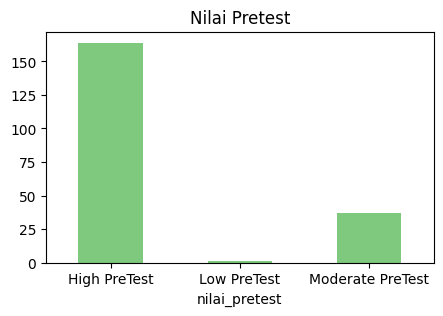

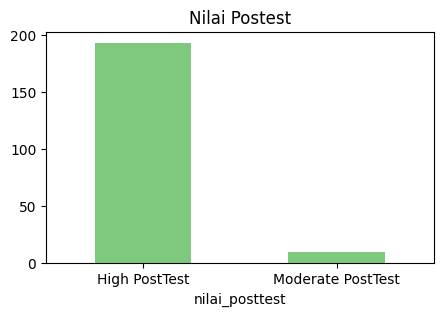

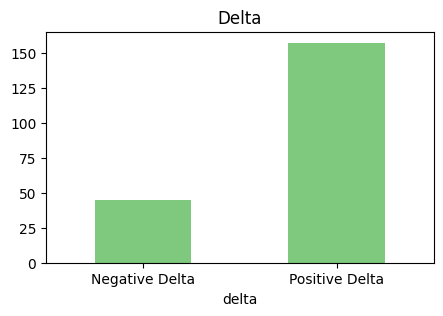

In [ ]:
# visualisasi sebaran klasifikasi nilai
df_nilaiemosi.groupby('nilai_pretest').size().plot(kind='bar', figsize=(5,3), colormap='Accent')
plt.title('Nilai Pretest')
plt.xticks(rotation=0)
plt.show()

df_nilaiemosi.groupby('nilai_posttest').size().plot(kind='bar', figsize=(5,3), colormap='Accent')
plt.title('Nilai Postest')
plt.xticks(rotation=0)
plt.show()

df_nilaiemosi.groupby('delta').size().plot(kind='bar', figsize=(5,3), colormap='Accent')
plt.title('Delta')
plt.xticks(rotation=0)
plt.show()

Pada visualisasi di atas, diketahui bahwa pada data Nilai Emosi terdapat kelas yang memiliki jumlah data sangat sedikit (extreme imbalance) sehingga dapat disebut juga sebagai outlier. Hal tersebut menyebabkan data tidak dapat dilakukan oversampling dengan metode SMOTE akibat kurangnya data untuk menjadi nearest neighbor sampel sintetis. Namun, diketahui bahwa outlier tidak benar-benar ada pada data Likert Scale. Oleh sebab itu, kelas yang memiliki data sangat sedikit akan dilakukan manual oversampling dengan menduplikasi data hingga k-nearest neighbor terpenuhi.

In [ ]:
# copying df_nilaiemosi
df_nilaiemosi_copy = df_nilaiemosi.copy(deep=True)


print("Before Manual Overfitting")
print(Counter(df_nilaiemosi_copy['nilai_pretest']))

# melakukan overfitting manual untuk nilai yang imbalance sangat ekstrim
# agar dapat dilakukan SMOTE
for i in range(5):
    df_nilaiemosi_copy = df_nilaiemosi_copy.append(df_nilaiemosi_copy.loc[df_nilaiemosi_copy['nilai_pretest'] == 'Low PreTest'].iloc[0], ignore_index=True)

print("\nAfter Manual Overfitting")
print(Counter(df_nilaiemosi_copy['nilai_pretest']))

Before Manual Overfitting
Counter({'High PreTest': 164, 'Moderate PreTest': 37, 'Low PreTest': 1})

After Manual Overfitting
Counter({'High PreTest': 164, 'Moderate PreTest': 37, 'Low PreTest': 6})


Setelah dilakukan manual oversampling, dilakukan oversampling dengan metode SMOTE dan train test split dengan metode Stratified Random Sampling. Data yang dihasilkan dapat digunakan untuk kebutuhan modelling dan prediksi pada ketiga metode yang akan digunakan.

In [ ]:
# mengambil dataset dalam bentuk array
array_nilaiemosi = df_nilaiemosi_copy.values

# mendefinisikan X dan Y untuk setiap klasifiaksi
X_ne_classif = {}
X_ne_classif['nilai_pretest'] = array_nilaiemosi[:,2:-3]  # hanya mengambil fitur saja
X_ne_classif['nilai_posttest'] = array_nilaiemosi[:,2:-3]
X_ne_classif['delta'] = array_nilaiemosi[:,2:-3]
# X_ne_classif

y_ne_classif = {}
y_ne_classif['nilai_pretest'] = array_nilaiemosi[:,-3]
y_ne_classif['nilai_posttest'] = array_nilaiemosi[:,-2]
y_ne_classif['delta'] = array_nilaiemosi[:,-1]
# y_ne_classif


# Train_test_split dengan metode Stratified Random Sampling dan oversampling dengan metode SMOTE
# mendefinisikan dictionary untuk menyimpan split X dan Y setiap klasifikasi
X_train_ne = {}
X_validation_ne = {}
Y_train_ne = {}
Y_validation_ne = {}

# oversampling SMOTE dan Stratified Random Sampling
oversample_ne = SMOTE(random_state=1)
for emotion in y_ne_classif.keys():
    X_ne_classif[emotion], y_ne_classif[emotion] = oversample_ne.fit_resample(X_ne_classif[emotion], y_ne_classif[emotion])
    X_ne_classif[emotion] = X_ne_classif[emotion].round()
    X_train_ne[emotion], X_validation_ne[emotion], Y_train_ne[emotion], Y_validation_ne[emotion] = train_test_split(X_ne_classif[emotion],
        y_ne_classif[emotion], test_size=0.20, random_state=1, stratify=y_ne_classif[emotion])


# Dataframe untuk menyimpan hasil akurasi & digunakan untuk plotting
ne_default_classif = pd.DataFrame(index=list(y_ne_classif.keys()) + ['Summary'], columns=['Naive Bayes', "Support Vector Machine", "K-Nearest Neighbor"])
ne_classif = pd.DataFrame(index=list(y_ne_classif.keys()) + ['Summary'], columns=['Naive Bayes', "Support Vector Machine", "K-Nearest Neighbor"])


# looping untuk cek jumlah instance tiap kelas masing-masing klasifikasi
for emotion in y_ne_classif.keys():
    print(Counter(y_ne_classif[emotion]))

Counter({'High PreTest': 164, 'Moderate PreTest': 164, 'Low PreTest': 164})
Counter({'High PostTest': 198, 'Moderate PostTest': 198})
Counter({'Positive Delta': 162, 'Negative Delta': 162})


#### NB

In [ ]:
# modelling dan prediksi
model_ne_default_NB, predictions_ne_default_NB, ne_default_classif = classif_NB_default(y_ne_classif, 
    X_train_ne, Y_train_ne, X_validation_ne, Y_validation_ne, ne_default_classif)

Emotion = nilai_pretest
                  precision    recall  f1-score   support

    High PreTest       0.59      0.48      0.53        33
     Low PreTest       1.00      1.00      1.00        33
Moderate PreTest       0.56      0.67      0.61        33

        accuracy                           0.72        99
       macro avg       0.72      0.72      0.71        99
    weighted avg       0.72      0.72      0.71        99

Emotion = nilai_posttest
                   precision    recall  f1-score   support

    High PostTest       0.88      0.88      0.88        40
Moderate PostTest       0.88      0.88      0.88        40

         accuracy                           0.88        80
        macro avg       0.88      0.88      0.88        80
     weighted avg       0.88      0.88      0.88        80

Emotion = delta
                precision    recall  f1-score   support

Negative Delta       0.62      0.78      0.69        32
Positive Delta       0.72      0.55      0.62        33


--> Penjelasan

Poin utama yang menjadi fokus pengukuran kualitas prediksi algoritma klasifikasi ialah akurasi dan weighted avg untuk precision dan recall. Akurasi lebih dipilih daripada F1-score karena penggunaan oversampling mengakibatkan jumlah sampel masing-masing kelas sama banyak, selain itu metode pengambilan sampel untuk data latih dan data uji menggunakan Stratified Random Sampling sehingga jumlah data latih dan data uji masing-masing kelas juga sama banyak. Oleh sebab itu, nilai Akurasi dan F1-score akan sama atau paling tidak mendekati. Dengan alasan yang sama weighted avg lebih dipilih daripada macro avg.

Pada classification report di atas, didapatkan akurasi yang kurang tinggi pada Algoritma Naive Bayes yaitu 72%, 88% dan 66%. Precision yang didapatkan sebesar 72%, 88% dan 67%, sehingga diketahui bahwa False Positive (FP) algoritma cukup besar. Recall yang didapatkan sebesar 72%, 88% dan 66%, sehingga diketahui bahwa False Negative (FN) algoritma cukup besar juga.

In [ ]:
# mencetak akurasi klasifikasi
print("NB Accuracy")
ne_default_classif['Naive Bayes']

NB Accuracy


nilai_pretest     0.717172
nilai_posttest       0.875
delta             0.661538
Summary                NaN
Name: Naive Bayes, dtype: object

Didapatkan akurasi yang kurang tinggi, yaitu 72%, 88% dan 66%.

In [ ]:
# mendapatkan confusion matrix dan menyimpannya ke dalam variabel
confmatrix_ne_default_NB = get_confusionmatrix(y_ne_classif, Y_validation_ne, predictions_ne_default_NB)
confmatrix_ne_default_NB

{'nilai_pretest':                   TP  FP  FN  TN
 High PreTest      16  17  11  55
 Low PreTest       33   0   0  66
 Moderate PreTest  22  11  17  49,
 'nilai_posttest':                    TP FP FN  TN
 High PostTest      35  5  5  35
 Moderate PostTest  35  5  5  35,
 'delta':                 TP  FP  FN  TN
 Negative Delta  25   7  15  18
 Positive Delta  18  15   7  25}

Didapatkan bahwa hasil klasifikasi Naive Bayes untuk data Nilai Emosi tidak baik. Hal ini ditunjukkan pada jumlah False Positive (FP) dan False Negative (FN) yang besar.

#### SVM

In [ ]:
# modelling dan prediksi
model_ne_default_SVM, predictions_ne_default_SVM, ne_default_classif = classif_SVM_default(y_ne_classif,
    X_train_ne, Y_train_ne, X_validation_ne, Y_validation_ne, ne_default_classif)

Emotion = nilai_pretest
                  precision    recall  f1-score   support

    High PreTest       0.90      0.85      0.88        33
     Low PreTest       1.00      1.00      1.00        33
Moderate PreTest       0.86      0.91      0.88        33

        accuracy                           0.92        99
       macro avg       0.92      0.92      0.92        99
    weighted avg       0.92      0.92      0.92        99

Emotion = nilai_posttest
                   precision    recall  f1-score   support

    High PostTest       1.00      0.97      0.99        40
Moderate PostTest       0.98      1.00      0.99        40

         accuracy                           0.99        80
        macro avg       0.99      0.99      0.99        80
     weighted avg       0.99      0.99      0.99        80

Emotion = delta
                precision    recall  f1-score   support

Negative Delta       0.71      0.94      0.81        32
Positive Delta       0.91      0.64      0.75        33


--> Penjelasan

Poin utama yang menjadi fokus pengukuran kualitas prediksi algoritma klasifikasi ialah akurasi dan weighted avg untuk precision dan recall. Akurasi lebih dipilih daripada F1-score karena penggunaan oversampling mengakibatkan jumlah sampel masing-masing kelas sama banyak, selain itu metode pengambilan sampel untuk data latih dan data uji menggunakan Stratified Random Sampling sehingga jumlah data latih dan data uji masing-masing kelas juga sama banyak. Oleh sebab itu, nilai Akurasi dan F1-score akan sama atau paling tidak mendekati. Dengan alasan yang sama weighted avg lebih dipilih daripada macro avg.

Pada classification report di atas, didapatkan akurasi yang tinggi pada Algoritma Support Vector Machine yaitu 92%, 99% dan 78%. Precision yang didapatkan sebesar 92%, 99% dan 82%, sehingga diketahui bahwa False Positive (FP) algoritma cukup kecil. Recall yang didapatkan mencapai 92%, 99% dan 78%, sehingga diketahui bahwa False Negative (FN) algoritma cukup kecil juga.

In [ ]:
# mencetak akurasi klasifikasi
print("SVM Accuracy")
ne_default_classif['Support Vector Machine']

SVM Accuracy


nilai_pretest     0.919192
nilai_posttest      0.9875
delta             0.784615
Summary                NaN
Name: Support Vector Machine, dtype: object

Didapatkan akurasi yang tinggi, yaitu 92%, 99% dan 78%.

In [ ]:
# mendapatkan confusion matrix dan menyimpannya ke dalam variabel
confmatrix_ne_default_SVM = get_confusionmatrix(y_ne_classif, Y_validation_ne, predictions_ne_default_SVM)
confmatrix_ne_default_SVM

{'nilai_pretest':                   TP FP FN  TN
 High PreTest      28  5  3  63
 Low PreTest       33  0  0  66
 Moderate PreTest  30  3  5  61,
 'nilai_posttest':                    TP FP FN  TN
 High PostTest      39  1  0  40
 Moderate PostTest  40  0  1  39,
 'delta':                 TP  FP  FN  TN
 Negative Delta  30   2  12  21
 Positive Delta  21  12   2  30}

Didapatkan bahwa hasil klasifikasi Support Vector machine untuk data Nilai Emosi cukup baik. Hal ini ditunjukkan pada jumlah False Positive (FP) dan False Negative (FN) yang cukup kecil, namun cukup besar pada delta.

#### KNN

In [ ]:
# modelling dan prediksi
model_ne_default_KNN, predictions_ne_default_KNN, ne_default_classif = classif_KNN_default(y_ne_classif,
    X_train_ne, Y_train_ne, X_validation_ne, Y_validation_ne, ne_default_classif)

Emotion = nilai_pretest
                  precision    recall  f1-score   support

    High PreTest       0.85      0.67      0.75        33
     Low PreTest       1.00      1.00      1.00        33
Moderate PreTest       0.72      0.88      0.79        33

        accuracy                           0.85        99
       macro avg       0.86      0.85      0.85        99
    weighted avg       0.86      0.85      0.85        99

Emotion = nilai_posttest
                   precision    recall  f1-score   support

    High PostTest       1.00      0.55      0.71        40
Moderate PostTest       0.69      1.00      0.82        40

         accuracy                           0.78        80
        macro avg       0.84      0.78      0.76        80
     weighted avg       0.84      0.78      0.76        80

Emotion = delta
                precision    recall  f1-score   support

Negative Delta       0.60      0.91      0.72        32
Positive Delta       0.82      0.42      0.56        33


--> Penjelasan

Poin utama yang menjadi fokus pengukuran kualitas prediksi algoritma klasifikasi ialah akurasi dan weighted avg untuk precision dan recall. Akurasi lebih dipilih daripada F1-score karena penggunaan oversampling mengakibatkan jumlah sampel masing-masing kelas sama banyak, selain itu metode pengambilan sampel untuk data latih dan data uji menggunakan Stratified Random Sampling sehingga jumlah data latih dan data uji masing-masing kelas juga sama banyak. Oleh sebab itu, nilai Akurasi dan F1-score akan sama atau paling tidak mendekati. Dengan alasan yang sama weighted avg lebih dipilih daripada macro avg.

Pada classification report di atas, didapatkan akurasi yang kurang tinggi pada Algoritma K-Nearest Neighbor yaitu 85%, 78% dan 66%. Precision yang didapatkan sebesar 86%, 84% dan 72%, sehingga diketahui bahwa False Positive (FP) cukup besar. Recall yang didapatkan sebesar 85%, 78% dan 66%, sehingga diketahui bahwa False Negative (FN) ckukup besar juga.

In [ ]:
# mencetak akurasi klasifikasi
print("KNN Accuracy")
ne_default_classif['K-Nearest Neighbor']

KNN Accuracy


nilai_pretest     0.848485
nilai_posttest       0.775
delta             0.661538
Summary                NaN
Name: K-Nearest Neighbor, dtype: object

Didapatkan akurasi yang kurang tinggi, yaitu 85%, 78% dan 66%.

In [ ]:
# mendapatkan confusion matrix dan menyimpannya ke dalam variabel
confmatrix_ne_default_KNN = get_confusionmatrix(y_ne_classif, Y_validation_ne, predictions_ne_default_KNN)
confmatrix_ne_default_KNN

{'nilai_pretest':                   TP  FP  FN  TN
 High PreTest      22  11   4  62
 Low PreTest       33   0   0  66
 Moderate PreTest  29   4  11  55,
 'nilai_posttest':                    TP  FP  FN  TN
 High PostTest      22  18   0  40
 Moderate PostTest  40   0  18  22,
 'delta':                 TP  FP  FN  TN
 Negative Delta  29   3  19  14
 Positive Delta  14  19   3  29}

Didapatkan bahwa hasil klasifikasi K-Nearest Neighbor untuk data Nilai Emosi kurang baik. Hal ini ditunjukkan pada jumlah False Positive (FP) dan False Negative (FN) yang cukup besar

#### Result

Didapatkan hasil algoritma paling baik dimulai dari SVM, KNN dan NB.

In [ ]:
# mendapatkan rata-rata klasifikasi setiap algoritma dan mencetaknya
ne_default_classif = get_accuracysummary(ne_default_classif)
ne_default_classif

,Naive Bayes,Support Vector Machine,K-Nearest Neighbor
nilai_pretest,71.72,91.92,84.85
nilai_posttest,87.50,98.75,77.50
delta,66.15,78.46,66.15
Summary,75.12,89.71,76.17


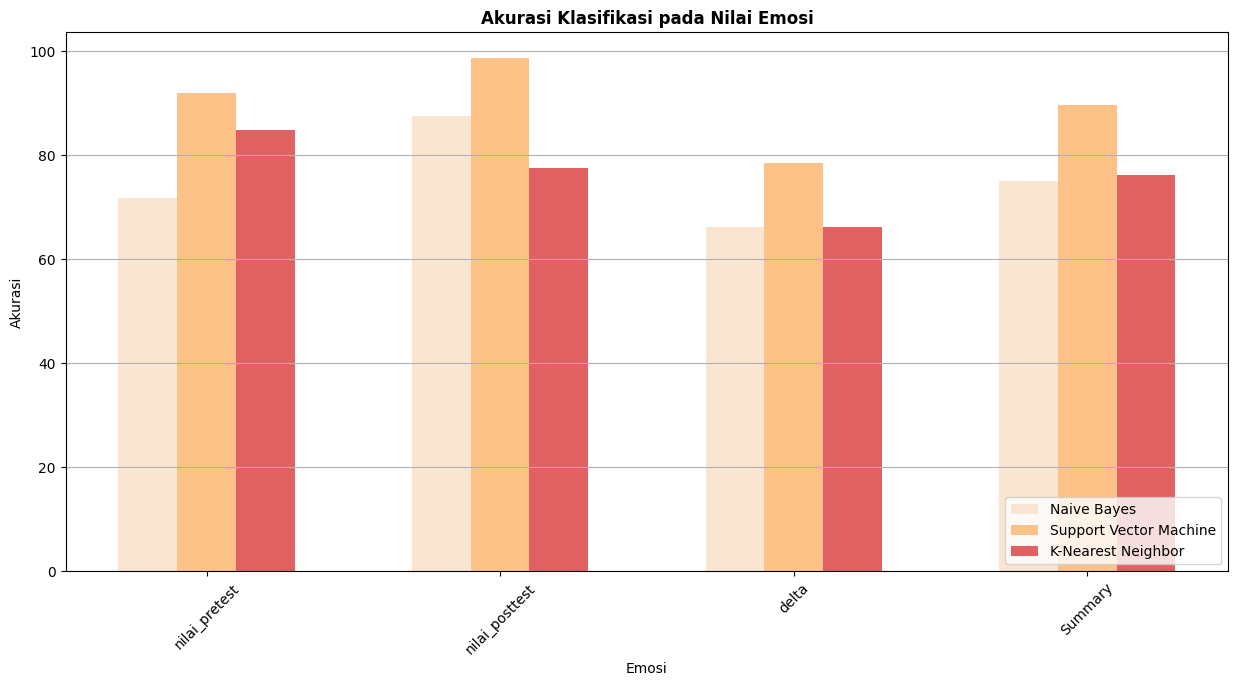

In [ ]:
# mencetak visualisasi akurasi klasifikasi Nilai Emosi
get_accuracyvisualization('Nilai Emosi', ne_default_classif)

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa algoritma yang dapat mengklasifikasi data Nilai Emosi dengan cukup baik hanyalah Support Vector Machine. Hal ini dapat dilihat dari akurasi yang ditunjukkan diagram batang, di mana akurasi Support Vector Machine berada di atas 80%, sedangkan Naive Bayes dan K-Nearest Neighbor hanya di bawah 80%. Bagian Summary menunjukkan rata-rata akurasi algoritma terhadap data Nilai Emosi. Dari ketiga algoritma klasifikasi yang digunakan, diketahui bahwa Support Vector Machine memiliki akurasi yang paling tinggi dibandingkan dengan dua algoritma lainnya.

### 3.1.2. Klasifikasi Nilai (2)

Berdasarkan klasifikasi emosi

Pada kasus ini akan dilakukan klasifikasi nilai mahasiswa. Nilai yang diklasifikasikan antara lain nilai pre-test, post-test, dan delta (perubahan nilai). Nilai tersebut akan diklasifikasikan berdasarkan data klasifikasi emosi, yaitu data regulasi emosi seorang mahasiswa. Untuk itu, dibuat dataset baru yang berisi data regulasi emosi mahasiswa yang terdiri dari AEQ, DASS, dan ERQ beserta klasifikasi nilainya. Namun, karena beberapa algoritma tidak dapat mengolah data kategorikal, oleh sebab itu dilakukan label encoding pada regulasi emosi mahasiswa.

In [ ]:
# membuat dataframe baru yang menggabungkan emosi mahasiswa dengan hasil nilai ujian
df_classemosi = pd.DataFrame()
df_classemosi = df_aeq_new.loc[:, df_aeq_new.columns[:2]].copy()
df_classemosi[df_aeq_new.columns[-4:]] = df_aeq_new.loc[:, df_aeq_new.columns[-4:]].copy()
df_classemosi[df_dass_new.columns[-3:]] = df_dass_new.loc[:, df_dass_new.columns[-3:]].copy()
df_classemosi[df_erq_new.columns[-2:]] = df_erq_new.loc[:, df_erq_new.columns[-2:]].copy()
df_classemosi[df_nilai_new.columns[2:]] = df_nilai_new.loc[:, df_nilai_new.columns[2:]].copy()

# label encoding setiap klasifikasi nilai agar dapat diolah algoritma yang bersangkutan
for col in list(df_classemosi.columns[2:6]) + list(df_classemosi.columns[9:11]):
    # print(col)
    df_classemosi.loc[df_classemosi[col] == 'Low', col] = 0
    df_classemosi.loc[df_classemosi[col] == 'Moderate', col] = 1
    df_classemosi.loc[df_classemosi[col] == 'High', col] = 2
    
for col in df_classemosi.columns[6:9]:
    df_classemosi.loc[df_classemosi[col] == 'Normal', col] = 0
    df_classemosi.loc[df_classemosi[col] == 'Mild', col] = 1
    df_classemosi.loc[df_classemosi[col] == 'Moderate', col] = 2
    df_classemosi.loc[df_classemosi[col] == 'Severe', col] = 3
    df_classemosi.loc[df_classemosi[col] == 'Extremely severe', col] = 4

df_classemosi.head(2)

,NIM,Mata Kuliah,Class_Positive,Class_Negative,Learn_Positive,Learn_Negative,Depression,Anxiety,Stress,CRF,ESF,nilai_pretest,nilai_posttest,delta
0,205150207111012,Lainnya,1,0,2,0,0,0,0,1,1,High PreTest,High PostTest,Positive Delta
1,205150200111037,Lainnya,1,0,2,0,0,0,0,1,2,High PreTest,High PostTest,Positive Delta


Diketahui, pada data Class Emosi terdapat kelas yang memiliki jumlah data sangat sedikit (extreme imbalance) sehingga dapat disebut juga sebagai outlier. Hal tersebut menyebabkan data tidak dapat dilakukan oversampling dengan metode SMOTE akibat kurangnya data untuk menjadi nearest neighbor sampel sintetis. Namun, diketahui bahwa outlier tidak benar-benar ada pada data Likert Scale. Oleh sebab itu, kelas yang memiliki data sangat sedikit akan dilakukan manual oversampling dengan menduplikasi data hingga k-nearest neighbor terpenuhi.

In [ ]:
# copying df_classemosi
df_classemosi_copy = df_classemosi.copy(deep=True)


print("Before Manual Overfitting")
print(Counter(df_classemosi_copy['nilai_pretest']))

# melakukan overfitting manual untuk nilai yang imbalance sangat ekstrim
# agar dapat dilakukan SMOTE
for i in range(5):
    df_classemosi_copy = df_classemosi_copy.append(df_classemosi_copy.loc[df_classemosi_copy['nilai_pretest'] == 'Low PreTest'].iloc[0], ignore_index=True)

print("\nAfter Manual Overfitting")
print(Counter(df_classemosi_copy['nilai_pretest']))

Before Manual Overfitting
Counter({'High PreTest': 164, 'Moderate PreTest': 37, 'Low PreTest': 1})

After Manual Overfitting
Counter({'High PreTest': 164, 'Moderate PreTest': 37, 'Low PreTest': 6})


Setelah dilakukan manual oversampling, dilakukan oversampling dengan metode SMOTE dan train test split dengan metode Stratified Random Sampling. Data yang dihasilkan dapat digunakan untuk kebutuhan modelling dan prediksi pada ketiga metode yang akan digunakan.

In [ ]:
# mengambil dataset dalam bentuk array
array_classemosi = df_classemosi_copy.values

# mendefinisikan X dan Y untuk setiap klasifikasi
X_ce_classif = {}
X_ce_classif['nilai_pretest'] = array_classemosi[:,2:-3]
X_ce_classif['nilai_posttest'] = array_classemosi[:,2:-3]
X_ce_classif['delta'] = array_classemosi[:,2:-3]
# X_ce_classif

y_ce_classif = {}
y_ce_classif['nilai_pretest'] = array_classemosi[:,-3]
y_ce_classif['nilai_posttest'] = array_classemosi[:,-2]
y_ce_classif['delta'] = array_classemosi[:,-1]
# y_ce_classif


# Train_test_split dengan metode Stratified Random Sampling dan oversampling dengan metode SMOTE
# mendefinisikan dictionary untuk menyimpan split X dan Y setiap klasifikasi
X_train_ce = {}
X_validation_ce = {}
Y_train_ce = {}
Y_validation_ce = {}

# oversampling SMOTE dan Stratified Random Sampling
oversample_ce = SMOTE(random_state=1)
for emotion in y_ce_classif.keys():
    X_ce_classif[emotion], y_ce_classif[emotion] = oversample_ce.fit_resample(X_ce_classif[emotion], y_ce_classif[emotion])
    X_ce_classif[emotion] = X_ce_classif[emotion].round()
    X_train_ce[emotion], X_validation_ce[emotion], Y_train_ce[emotion], Y_validation_ce[emotion] = train_test_split(X_ce_classif[emotion],
        y_ce_classif[emotion], test_size=0.20, random_state=1, stratify=y_ce_classif[emotion])


# Dataframe untuk menyimpan hasil akurasi & digunakan untuk plotting
ce_default_classif = pd.DataFrame(index=list(y_ce_classif.keys()) + ['Summary'], columns=['Naive Bayes', "Support Vector Machine", "K-Nearest Neighbor"])

# looping untuk cek jumlah instance tiap kelas masing-masing klasifikasi
for emotion in y_ce_classif.keys():
    print(Counter(y_ce_classif[emotion]))

Counter({'High PreTest': 164, 'Moderate PreTest': 164, 'Low PreTest': 164})
Counter({'High PostTest': 198, 'Moderate PostTest': 198})
Counter({'Positive Delta': 162, 'Negative Delta': 162})


#### NB

In [ ]:
# modelling dan prediksi
model_ce_default_NB, predictions_ce_default_NB, ce_default_classif = classif_NB_default(y_ce_classif, 
    X_train_ce, Y_train_ce, X_validation_ce, Y_validation_ce, ce_default_classif)

Emotion = nilai_pretest
                  precision    recall  f1-score   support

    High PreTest       0.55      0.33      0.42        33
     Low PreTest       1.00      1.00      1.00        33
Moderate PreTest       0.52      0.73      0.61        33

        accuracy                           0.69        99
       macro avg       0.69      0.69      0.67        99
    weighted avg       0.69      0.69      0.67        99

Emotion = nilai_posttest
                   precision    recall  f1-score   support

    High PostTest       0.55      0.57      0.56        40
Moderate PostTest       0.55      0.53      0.54        40

         accuracy                           0.55        80
        macro avg       0.55      0.55      0.55        80
     weighted avg       0.55      0.55      0.55        80

Emotion = delta
                precision    recall  f1-score   support

Negative Delta       0.54      0.78      0.64        32
Positive Delta       0.63      0.36      0.46        33


--> Penjelasan

Poin utama yang menjadi fokus pengukuran kualitas prediksi algoritma klasifikasi ialah akurasi dan weighted avg untuk precision dan recall. Akurasi lebih dipilih daripada F1-score karena penggunaan oversampling mengakibatkan jumlah sampel masing-masing kelas sama banyak, selain itu metode pengambilan sampel untuk data latih dan data uji menggunakan Stratified Random Sampling sehingga jumlah data latih dan data uji masing-masing kelas juga sama banyak. Oleh sebab itu, nilai Akurasi dan F1-score akan sama atau paling tidak mendekati. Dengan alasan yang sama weighted avg lebih dipilih daripada macro avg.

Pada classification report di atas, didapatkan akurasi yang rendah pada Algoritma Naive Bayes yaitu di bawah 70% bahkan hanya 55%. Precision yang didapatkan paling besar hanya mencapai 71% dan lainnya hanya sekitar 55%, sehingga diketahui bahwa False Positive (FP) algoritma sangat besar. Recall yang didapatkan paling besar tidak mencapai 70% dan lainya hanya sekitar 55%, sehingga diketahui bahwa False Negative (FN) algoritma sangat besar juga.

In [ ]:
# mencetak akurasi klasifikasi
print("NB Accuracy")
ce_default_classif['Naive Bayes']

NB Accuracy


nilai_pretest     0.686869
nilai_posttest        0.55
delta             0.569231
Summary                NaN
Name: Naive Bayes, dtype: object

Didapatkan akurasi rendah, bahkan terdapat skor akurasi 55%.

In [ ]:
# mendapatkan confusion matrix dan menyimpannya ke dalam variabel
confmatrix_ce_default_NB = get_confusionmatrix(y_ce_classif, Y_validation_ce, predictions_ce_default_NB)
confmatrix_ce_default_NB

{'nilai_pretest':                   TP  FP  FN  TN
 High PreTest      11  22   9  57
 Low PreTest       33   0   0  66
 Moderate PreTest  24   9  22  44,
 'nilai_posttest':                    TP  FP  FN  TN
 High PostTest      23  17  19  21
 Moderate PostTest  21  19  17  23,
 'delta':                 TP  FP  FN  TN
 Negative Delta  25   7  21  12
 Positive Delta  12  21   7  25}

Didapatkan bahwa hasil klasifikasi Naive Bayes untuk data Class Emosi tidak baik. Hal ini ditunjukkan pada jumlah False Positive (FP) dan False Negative (FN) yang sangat besar.

#### SVM

In [ ]:
# modelling dan prediksi
model_ce_default_SVM, predictions_ce_default_SVM, ce_default_classif = classif_SVM_default(y_ce_classif,
    X_train_ce, Y_train_ce, X_validation_ce, Y_validation_ce, ce_default_classif)

Emotion = nilai_pretest
                  precision    recall  f1-score   support

    High PreTest       0.68      0.39      0.50        33
     Low PreTest       1.00      1.00      1.00        33
Moderate PreTest       0.57      0.82      0.68        33

        accuracy                           0.74        99
       macro avg       0.75      0.74      0.72        99
    weighted avg       0.75      0.74      0.73        99

Emotion = nilai_posttest
                   precision    recall  f1-score   support

    High PostTest       0.79      0.78      0.78        40
Moderate PostTest       0.78      0.80      0.79        40

         accuracy                           0.79        80
        macro avg       0.79      0.79      0.79        80
     weighted avg       0.79      0.79      0.79        80

Emotion = delta
                precision    recall  f1-score   support

Negative Delta       0.60      0.81      0.69        32
Positive Delta       0.73      0.48      0.58        33


--> Penjelasan

Poin utama yang menjadi fokus pengukuran kualitas prediksi algoritma klasifikasi ialah akurasi dan weighted avg untuk precision dan recall. Akurasi lebih dipilih daripada F1-score karena penggunaan oversampling mengakibatkan jumlah sampel masing-masing kelas sama banyak, selain itu metode pengambilan sampel untuk data latih dan data uji menggunakan Stratified Random Sampling sehingga jumlah data latih dan data uji masing-masing kelas juga sama banyak. Oleh sebab itu, nilai Akurasi dan F1-score akan sama atau paling tidak mendekati. Dengan alasan yang sama weighted avg lebih dipilih daripada macro avg.

Pada classification report di atas, didapatkan akurasi yang kurang tinggi pada Algoritma Support Vector Machine yaitu di di bawah 80%. Precision yang didapatkan di bawah 80%, sehingga diketahui bahwa False Positive (FP) algoritma besar. Recall yang didapatkan di bawah 80%, sehingga diketahui bahwa False Negative (FN) algoritma besar juga.

In [ ]:
# mencetak akurasi klasifikasi
print("SVM Accuracy")
ce_default_classif['Support Vector Machine']

SVM Accuracy


nilai_pretest     0.737374
nilai_posttest      0.7875
delta             0.646154
Summary                NaN
Name: Support Vector Machine, dtype: object

Didapatkan akurasi yang kurang tinggi, yaitu di bawah 80%.

In [ ]:
# mendapatkan confusion matrix dan menyimpannya ke dalam variabel
confmatrix_ce_default_SVM = get_confusionmatrix(y_ce_classif, Y_validation_ce, predictions_ce_default_SVM)
confmatrix_ce_default_SVM

{'nilai_pretest':                   TP  FP  FN  TN
 High PreTest      13  20   6  60
 Low PreTest       33   0   0  66
 Moderate PreTest  27   6  20  46,
 'nilai_posttest':                    TP FP FN  TN
 High PostTest      31  9  8  32
 Moderate PostTest  32  8  9  31,
 'delta':                 TP  FP  FN  TN
 Negative Delta  26   6  17  16
 Positive Delta  16  17   6  26}

Didapatkan bahwa hasil klasifikasi Support Vector Machine untuk data Class Emosi tidak baik. Hal ini ditunjukkan pada jumlah False Positive (FP) dan False Negative (FN) yang besar.

#### KNN

In [ ]:
# modelling dan prediksi
model_ce_default_KNN, predictions_ce_default_KNN, ce_default_classif = classif_KNN_default(y_ce_classif,
    X_train_ce, Y_train_ce, X_validation_ce, Y_validation_ce, ce_default_classif)

Emotion = nilai_pretest
                  precision    recall  f1-score   support

    High PreTest       0.65      0.73      0.69        33
     Low PreTest       0.94      1.00      0.97        33
Moderate PreTest       0.74      0.61      0.67        33

        accuracy                           0.78        99
       macro avg       0.78      0.78      0.77        99
    weighted avg       0.78      0.78      0.77        99

Emotion = nilai_posttest
                   precision    recall  f1-score   support

    High PostTest       0.95      0.50      0.66        40
Moderate PostTest       0.66      0.97      0.79        40

         accuracy                           0.74        80
        macro avg       0.81      0.74      0.72        80
     weighted avg       0.81      0.74      0.72        80

Emotion = delta
                precision    recall  f1-score   support

Negative Delta       0.58      0.81      0.68        32
Positive Delta       0.70      0.42      0.53        33


--> Penjelasan

Poin utama yang menjadi fokus pengukuran kualitas prediksi algoritma klasifikasi ialah akurasi dan weighted avg untuk precision dan recall. Akurasi lebih dipilih daripada F1-score karena penggunaan oversampling mengakibatkan jumlah sampel masing-masing kelas sama banyak, selain itu metode pengambilan sampel untuk data latih dan data uji menggunakan Stratified Random Sampling sehingga jumlah data latih dan data uji masing-masing kelas juga sama banyak. Oleh sebab itu, nilai Akurasi dan F1-score akan sama atau paling tidak mendekati. Dengan alasan yang sama weighted avg lebih dipilih daripada macro avg.

Pada classification report di atas, didapatkan akurasi yang kurang tinggi pada Algoritma K-Nearest Neighbor yaitu mendekati 80%. Precision yang didapatkan mendekati 80%, sehingga diketahui bahwa False Positive (FP) algoritma cukup besar. Recall yang didapatkan mendekati 80%, sehingga diketahui bahwa False Negative (FN) algoritma cukup besar juga.

In [ ]:
# mencetak akurasi klasifikasi
print("KNN Accuracy")
ce_default_classif['K-Nearest Neighbor']

KNN Accuracy


nilai_pretest     0.777778
nilai_posttest      0.7375
delta             0.615385
Summary                NaN
Name: K-Nearest Neighbor, dtype: object

Didapatkan akurasi yang kurang tinggi, yaitu di bawah 80%.

In [ ]:
# mendapatkan confusion matrix dan menyimpannya ke dalam variabel
confmatrix_ce_default_KNN = get_confusionmatrix(y_ce_classif, Y_validation_ce, predictions_ce_default_KNN)
confmatrix_ce_default_KNN

{'nilai_pretest':                   TP  FP  FN  TN
 High PreTest      24   9  13  53
 Low PreTest       33   0   2  64
 Moderate PreTest  20  13   7  59,
 'nilai_posttest':                    TP  FP  FN  TN
 High PostTest      20  20   1  39
 Moderate PostTest  39   1  20  20,
 'delta':                 TP  FP  FN  TN
 Negative Delta  26   6  19  14
 Positive Delta  14  19   6  26}

Didapatkan bahwa hasil klasifikasi K-Nearest Neighbor untuk data Class Emosi tidak baik. Hal ini ditunjukkan pada jumlah False Positive (FP) dan False Negative (FN) yang besar.

#### Result

Didapatkan hasil algoritma paling baik dimulai dari SVM, KNN, dan NB.

In [ ]:
# mendapatkan rata-rata klasifikasi setiap algoritma dan mencetaknya
ce_default_classif = get_accuracysummary(ce_default_classif)
ce_default_classif

,Naive Bayes,Support Vector Machine,K-Nearest Neighbor
nilai_pretest,68.69,73.74,77.78
nilai_posttest,55.00,78.75,73.75
delta,56.92,64.62,61.54
Summary,60.20,72.37,71.02


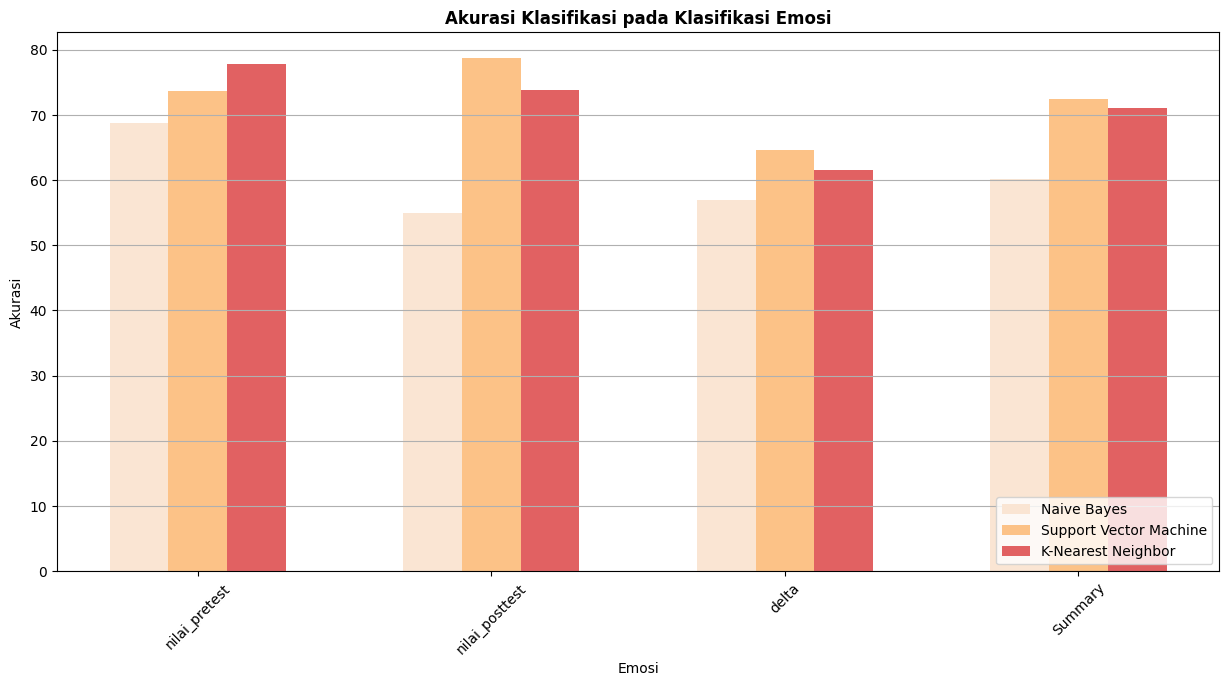

In [ ]:
# mencetak visualisasi akurasi klasifikasi Class Emosi
get_accuracyvisualization('Klasifikasi Emosi', ce_default_classif)

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa ketiga algoritma dapat mengklasifikasikan data Class Emosi dengan akurasi rendah. Hal ini dapat dilihat dari akurasi yang ditunjukkan diagram batang, di mana akurasi tiap algoritma tidak ada yang mencapai 80%, bahkan hanya di sekitar 55%. Bagian Summary menunjukkan rata-rata akurasi algoritma terhadap data Class Emosi. Dari ketiga algoritma klasifikasi yang digunakan, diketahui bahwa Support Vector Machine dan K-Nearest memiliki akurasi yang hampir sama, sedangkan Naive Bayes memiliki akurasi yang paling kecil.

### 3.1.3. Ringkasan Klasifikasi

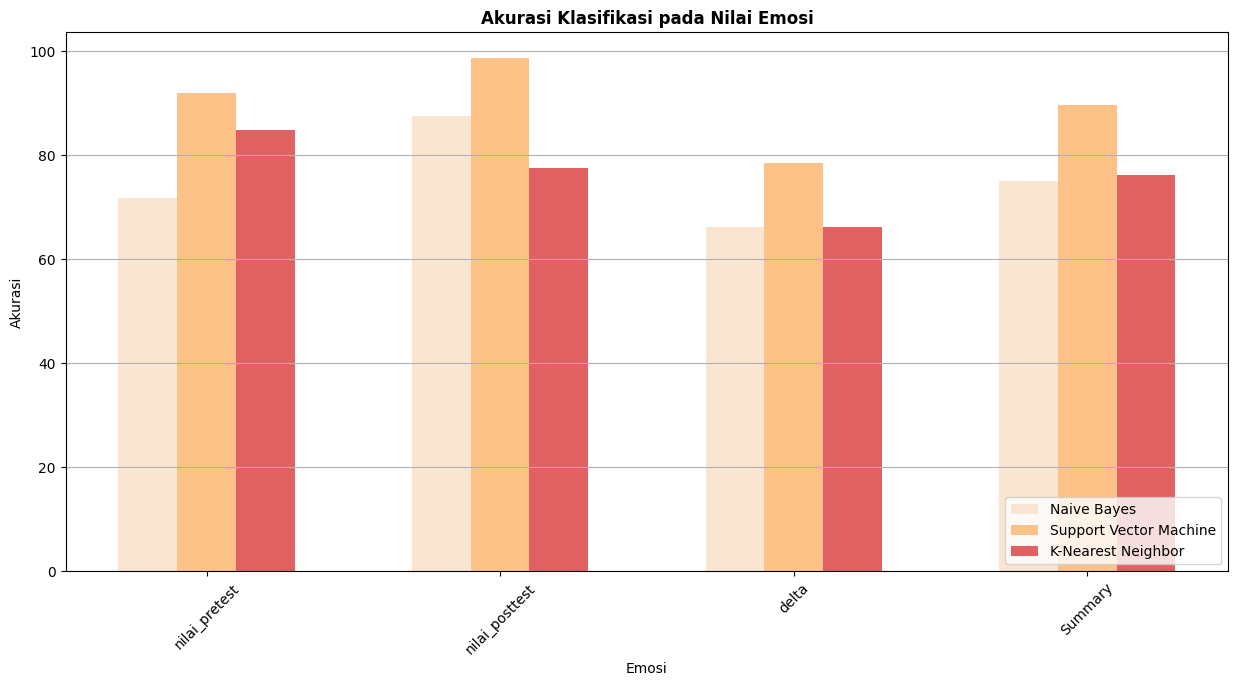

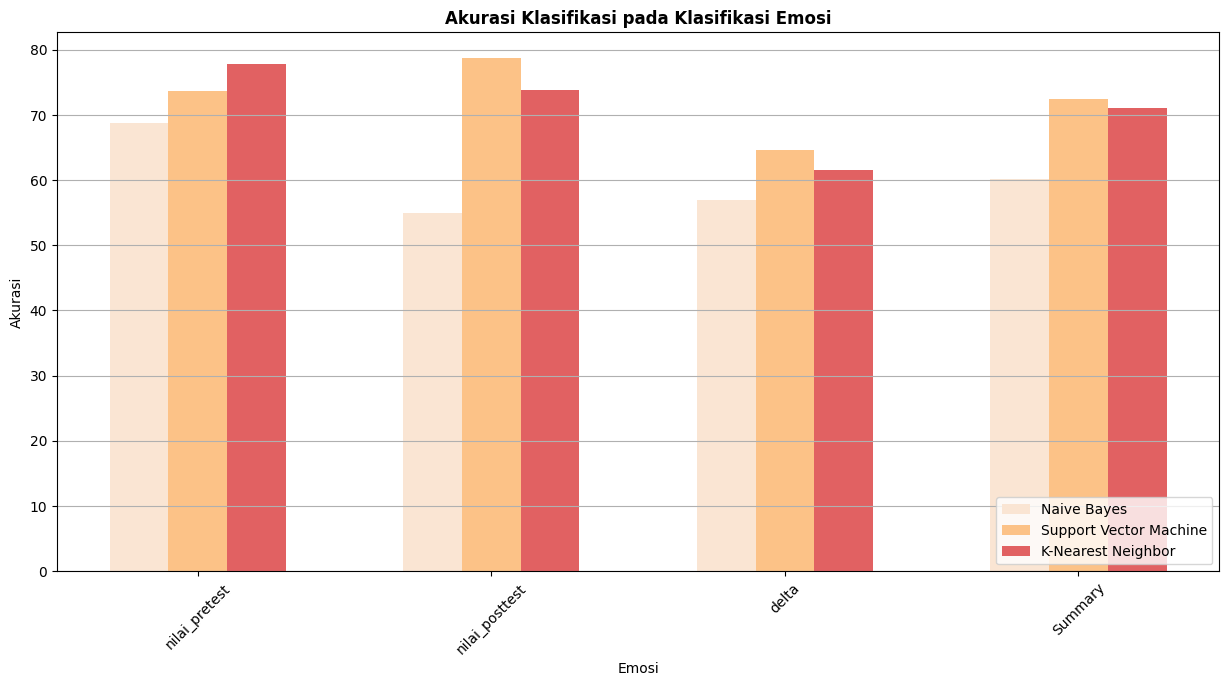

In [ ]:
# mencetak visualisasi akurasi klasifikasi yang sebelumnya telah dicetak
get_accuracyvisualization('Nilai Emosi', ne_default_classif)
get_accuracyvisualization('Klasifikasi Emosi', ce_default_classif)

--> Penjelasan

Pada ringkasan visualisasi di atas, didapatkan bahwa hasil akurasi pada klasifikasi Class Emosi lebih rendah jika dibandingkan dengan klasifikasi nilai menggunakan data Nilai Emosi. Hal ini sangat dimungkinkan terjadi karena klasifikasi Class Emosi menggunakan data regulasi emosi secara langsung atau dengan kata lain generalisasi / kesimpulan dari emosi yang dimiliki mahasiswa. Sedangkan klasifikasi Nilai Emosi menggunakan data yang membentuk regulasi emosi mahasiswa sehingga data menjadi lebih banyak dan spesifik. Oleh sebab itu, akurasi pada Class Emosi tidak baik dan datanya tidak cocok digunakan untuk mengklasifikasikan nilai mahasiswa akibat kurang spesifiknya emosi mahasiswa yang menggambarkan nilai yang didapatkan.

### 3.1.4. Penggunaan Hyperparameter Tuning pada Klasifikasi Nilai

Diketahui, performa terbaik didapatkan pada klasifikasi berdasarkan data emosi. Oleh sebab itu, hyperparameter tuning hanya dilakukan pada data emosi saja.

#### NB

In [ ]:
# grid search
gridsearch_NB(y_ne_classif, X_train_ne, Y_train_ne)

>> Emotion = nilai_pretest
Parameter = {'var_smoothing': 0.02848035868435802}
Score = 0.7530671859785785
>> Emotion = nilai_posttest
Parameter = {'var_smoothing': 0.0657933224657568}
Score = 0.8606150793650793
>> Emotion = delta
Parameter = {'var_smoothing': 0.02310129700083159}
Score = 0.67579185520362


Proses grid search menghasilkan parameter yang memiliki performa paling tinggi / terbaik untuk setiap klasifikasi. Namun, hanya salah satu dari parameter tersebut yang digunakan untuk mengklasifikasikan data Nilai Emosi. Oleh sebab itu, setiap parameter yang dihasilkan akan dicoba, kemudian diambil yang memiliki performa paling baik.

In [ ]:
# modelling dan prediksi
model_ne_NB, predictions_ne_NB, ne_classif = classif_NB(0.0657933224657568, y_ne_classif, 
    X_train_ne, Y_train_ne, X_validation_ne, Y_validation_ne, ne_classif)

Emotion = nilai_pretest
                  precision    recall  f1-score   support

    High PreTest       0.57      0.36      0.44        33
     Low PreTest       1.00      1.00      1.00        33
Moderate PreTest       0.53      0.73      0.62        33

        accuracy                           0.70        99
       macro avg       0.70      0.70      0.69        99
    weighted avg       0.70      0.70      0.69        99

Emotion = nilai_posttest
                   precision    recall  f1-score   support

    High PostTest       0.97      0.80      0.88        40
Moderate PostTest       0.83      0.97      0.90        40

         accuracy                           0.89        80
        macro avg       0.90      0.89      0.89        80
     weighted avg       0.90      0.89      0.89        80

Emotion = delta
                precision    recall  f1-score   support

Negative Delta       0.63      0.91      0.74        32
Positive Delta       0.84      0.48      0.62        33


--> Penjelasan

Poin utama yang menjadi fokus pengukuran kualitas prediksi algoritma klasifikasi ialah akurasi dan weighted avg untuk precision dan recall. Akurasi lebih dipilih daripada F1-score karena penggunaan oversampling mengakibatkan jumlah sampel masing-masing kelas sama banyak, selain itu metode pengambilan sampel untuk data latih dan data uji menggunakan Stratified Random Sampling sehingga jumlah data latih dan data uji masing-masing kelas juga sama banyak. Oleh sebab itu, nilai Akurasi dan F1-score akan sama atau paling tidak mendekati. Dengan alasan yang sama weighted avg lebih dipilih daripada macro avg.

Pada classification report di atas, didapatkan akurasi yang kurang tinggi pada Algoritma Naive Bayes yaitu 70%, 89% dan 69%. Precision yang didapatkan sebesar 70%, 90%, 74%, sehingga diketahui bahwa False Positive (FP) algoritma cukup besar. Recall yang didapatkan sebesar 70%, 89% dan 69%, sehingga diketahui bahwa False Negative (FN) algoritma cukup besar juga.

In [ ]:
# mencetak akurasi klasifikasi
print("NB Accuracy")
ne_classif['Naive Bayes']

NB Accuracy


nilai_pretest      0.69697
nilai_posttest      0.8875
delta             0.692308
Summary                NaN
Name: Naive Bayes, dtype: object

Didapatkan akurasi yang kurang tinggi, yaitu 70%, 89% dan 69%.

In [ ]:
# mendapatkan confusion matrix dan menyimpannya ke dalam variabel
confmatrix_ne_NB = get_confusionmatrix(y_ne_classif, Y_validation_ne, predictions_ne_NB)
confmatrix_ne_NB

{'nilai_pretest':                   TP  FP  FN  TN
 High PreTest      12  21   9  57
 Low PreTest       33   0   0  66
 Moderate PreTest  24   9  21  45,
 'nilai_posttest':                    TP FP FN  TN
 High PostTest      32  8  1  39
 Moderate PostTest  39  1  8  32,
 'delta':                 TP  FP  FN  TN
 Negative Delta  29   3  17  16
 Positive Delta  16  17   3  29}

Didapatkan bahwa hasil klasifikasi Naive Bayes untuk data Nilai Emosi tidak baik. Hal ini ditunjukkan pada jumlah False Positive (FP) dan False Negative (FN) yang besar.

#### SVM

In [ ]:
# grid search
gridsearch_SVM(y_ne_classif, X_train_ne, Y_train_ne)

>> Emotion = nilai_pretest
Parameter = {'gamma': 'auto', 'kernel': 'rbf', 'random_state': 1}
Score = 0.8955533917559235
>> Emotion = nilai_posttest
Parameter = {'gamma': 'auto', 'kernel': 'rbf', 'random_state': 1}
Score = 0.977827380952381
>> Emotion = delta
Parameter = {'gamma': 'auto', 'kernel': 'rbf', 'random_state': 1}
Score = 0.8263951734539969


Proses grid search menghasilkan parameter yang memiliki performa paling tinggi / terbaik untuk setiap klasifikasi. Namun, hanya salah satu dari parameter tersebut yang digunakan untuk mengklasifikasikan data Nilai Emosi. Oleh sebab itu, setiap parameter yang dihasilkan akan dicoba, kemudian diambil yang memiliki performa paling baik.

In [ ]:
# modelling dan prediksi
model_ne_SVM, predictions_ne_SVM, ne_classif = classif_SVM('auto', 'rbf', y_ne_classif,
    X_train_ne, Y_train_ne, X_validation_ne, Y_validation_ne, ne_classif)

Emotion = nilai_pretest
                  precision    recall  f1-score   support

    High PreTest       0.89      0.94      0.91        33
     Low PreTest       1.00      1.00      1.00        33
Moderate PreTest       0.94      0.88      0.91        33

        accuracy                           0.94        99
       macro avg       0.94      0.94      0.94        99
    weighted avg       0.94      0.94      0.94        99

Emotion = nilai_posttest
                   precision    recall  f1-score   support

    High PostTest       1.00      1.00      1.00        40
Moderate PostTest       1.00      1.00      1.00        40

         accuracy                           1.00        80
        macro avg       1.00      1.00      1.00        80
     weighted avg       1.00      1.00      1.00        80

Emotion = delta
                precision    recall  f1-score   support

Negative Delta       0.86      1.00      0.93        32
Positive Delta       1.00      0.85      0.92        33


--> Penjelasan

Poin utama yang menjadi fokus pengukuran kualitas prediksi algoritma klasifikasi ialah akurasi dan weighted avg untuk precision dan recall. Akurasi lebih dipilih daripada F1-score karena penggunaan oversampling mengakibatkan jumlah sampel masing-masing kelas sama banyak, selain itu metode pengambilan sampel untuk data latih dan data uji menggunakan Stratified Random Sampling sehingga jumlah data latih dan data uji masing-masing kelas juga sama banyak. Oleh sebab itu, nilai Akurasi dan F1-score akan sama atau paling tidak mendekati. Dengan alasan yang sama weighted avg lebih dipilih daripada macro avg.

Pada classification report di atas, didapatkan akurasi yang sangat tinggi pada Algoritma Support Vector Machine yaitu di atas 92% bahkan 100%. Precision yang didapatkan di atas 93% bahkan 100%, sehingga diketahui bahwa False Positive (FP) algoritma cukup kecil. Recall yang didapatkan di atas 92% bahkan 100%, sehingga diketahui bahwa False Negative (FN) algoritma cukup kecil juga.

In [ ]:
# mencetak akurasi klasifikasi
print("SVM Accuracy")
ne_classif['Support Vector Machine']

SVM Accuracy


nilai_pretest     0.939394
nilai_posttest         1.0
delta             0.923077
Summary                NaN
Name: Support Vector Machine, dtype: object

Didapatkan akurasi yang sangat tinggi, yaitu di atas 92% bahkan 100%.

In [ ]:
# mendapatkan confusion matrix dan menyimpannya ke dalam variabel
confmatrix_ne_SVM = get_confusionmatrix(y_ne_classif, Y_validation_ne, predictions_ne_SVM)
confmatrix_ne_SVM

{'nilai_pretest':                   TP FP FN  TN
 High PreTest      31  2  4  62
 Low PreTest       33  0  0  66
 Moderate PreTest  29  4  2  64,
 'nilai_posttest':                    TP FP FN  TN
 High PostTest      40  0  0  40
 Moderate PostTest  40  0  0  40,
 'delta':                 TP FP FN  TN
 Negative Delta  32  0  5  28
 Positive Delta  28  5  0  32}

Didapatkan bahwa hasil klasifikasi Support Vector Machine untuk data Nilai Emosi kurang baik. Hal ini ditunjukkan pada jumlah False Positive (FP) dan False Negative (FN) yang cukup besar.

#### KNN

In [ ]:
# grid search
gridsearch_KNN(y_ne_classif, X_train_ne, Y_train_ne)

>> Emotion = nilai_pretest
Parameter = {'n_neighbors': 2}
Score = 0.8803635183382019
>> Emotion = nilai_posttest
Parameter = {'n_neighbors': 2}
Score = 0.9017361111111111
>> Emotion = delta
Parameter = {'n_neighbors': 1}
Score = 0.834238310708899


Proses grid search menghasilkan parameter yang memiliki performa paling tinggi / terbaik untuk setiap klasifikasi. Namun, hanya salah satu dari parameter tersebut yang digunakan untuk mengklasifikasikan data Nilai Emosi. Oleh sebab itu, setiap parameter yang dihasilkan akan dicoba, kemudian diambil yang memiliki performa paling baik.

In [ ]:
# modelling dan prediksi
model_ne_KNN, predictions_ne_KNN, ne_classif = classif_KNN(1, y_ne_classif,
    X_train_ne, Y_train_ne, X_validation_ne, Y_validation_ne, ne_classif)

Emotion = nilai_pretest
                  precision    recall  f1-score   support

    High PreTest       1.00      0.64      0.78        33
     Low PreTest       1.00      1.00      1.00        33
Moderate PreTest       0.73      1.00      0.85        33

        accuracy                           0.88        99
       macro avg       0.91      0.88      0.87        99
    weighted avg       0.91      0.88      0.87        99

Emotion = nilai_posttest
                   precision    recall  f1-score   support

    High PostTest       1.00      0.62      0.77        40
Moderate PostTest       0.73      1.00      0.84        40

         accuracy                           0.81        80
        macro avg       0.86      0.81      0.81        80
     weighted avg       0.86      0.81      0.81        80

Emotion = delta
                precision    recall  f1-score   support

Negative Delta       0.73      1.00      0.84        32
Positive Delta       1.00      0.64      0.78        33


--> Penjelasan

Poin utama yang menjadi fokus pengukuran kualitas prediksi algoritma klasifikasi ialah akurasi dan weighted avg untuk precision dan recall. Akurasi lebih dipilih daripada F1-score karena penggunaan oversampling mengakibatkan jumlah sampel masing-masing kelas sama banyak, selain itu metode pengambilan sampel untuk data latih dan data uji menggunakan Stratified Random Sampling sehingga jumlah data latih dan data uji masing-masing kelas juga sama banyak. Oleh sebab itu, nilai Akurasi dan F1-score akan sama atau paling tidak mendekati. Dengan alasan yang sama weighted avg lebih dipilih daripada macro avg.

Pada classification report di atas, didapatkan akurasi yang cukup tinggi pada Algoritma K-Nearest Neighbor yaitu di atas 81%. Precision yang didapatkan berada di atas 86%, sehingga diketahui bahwa False Positive (FP) algoritma cukup kecil. Recall yang didapatkan berada di atas 81%, sehingga diketahui bahwa False Negative (FN) algoritma kecil.

In [ ]:
# mencetak akurasi klasifikasi
print("KNN Accuracy")
ne_classif['K-Nearest Neighbor']

KNN Accuracy


nilai_pretest     0.878788
nilai_posttest      0.8125
delta             0.815385
Summary                NaN
Name: K-Nearest Neighbor, dtype: object

Didapatkan akurasi yang cukup tinggi, yaitu di atas 81%.

In [ ]:
# mendapatkan confusion matrix dan menyimpannya ke dalam variabel
confmatrix_ne_KNN = get_confusionmatrix(y_ne_classif, Y_validation_ne, predictions_ne_KNN)
confmatrix_ne_KNN

{'nilai_pretest':                   TP  FP  FN  TN
 High PreTest      21  12   0  66
 Low PreTest       33   0   0  66
 Moderate PreTest  33   0  12  54,
 'nilai_posttest':                    TP  FP  FN  TN
 High PostTest      25  15   0  40
 Moderate PostTest  40   0  15  25,
 'delta':                 TP  FP  FN  TN
 Negative Delta  32   0  12  21
 Positive Delta  21  12   0  32}

Didapatkan bahwa hasil klasifikasi K-Nearest Neighbor untuk data Nilai Emosi kurang baik. Hal ini ditunjukkan pada jumlah False Positive (FP) dan False Negative (FN) yang cukup besar.

#### Result

Didapatkan hasil algoritma paling baik dimulai dari SVM, KNN, dan NB.

In [ ]:
# mendapatkan rata-rata klasifikasi setiap algoritma dan mencetaknya
ne_classif = get_accuracysummary(ne_classif)
ne_classif

,Naive Bayes,Support Vector Machine,K-Nearest Neighbor
nilai_pretest,69.70,93.94,87.88
nilai_posttest,88.75,100.00,81.25
delta,69.23,92.31,81.54
Summary,75.89,95.42,83.56


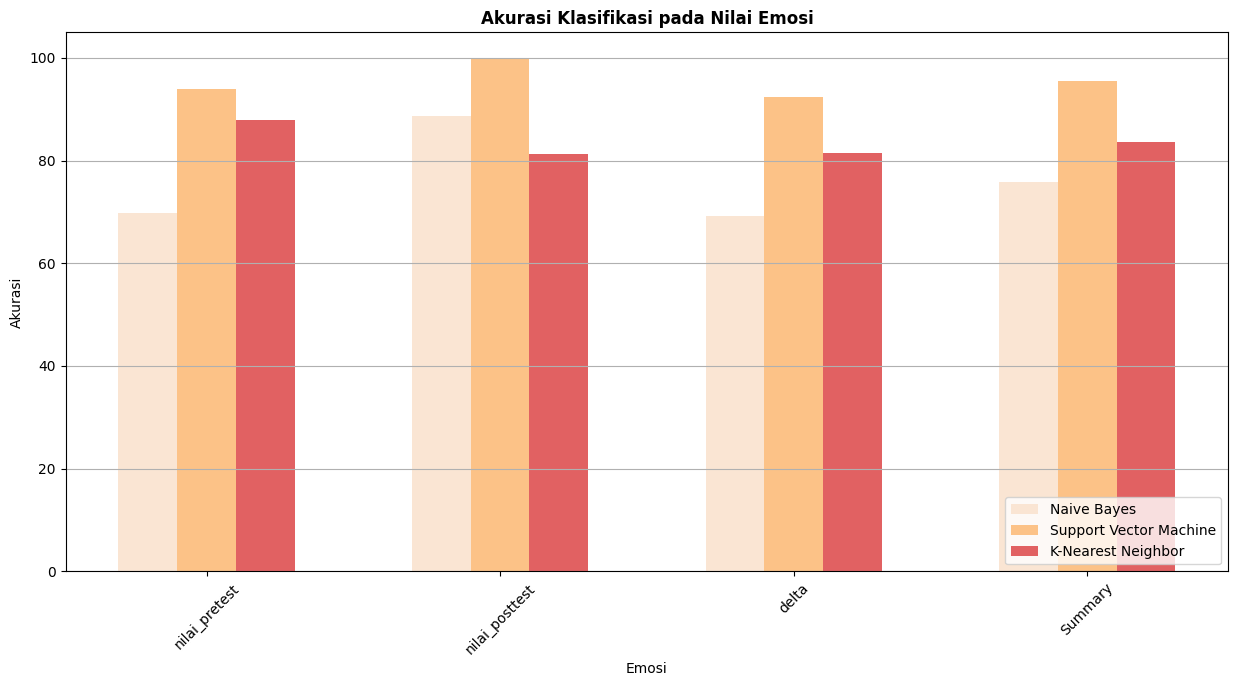

In [ ]:
# mencetak visualisasi akurasi klasifikasi Nilai Emosi
get_accuracyvisualization('Nilai Emosi dengan Hyperparameter Tuning', ne_classif)

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa ketiga algoritma dapat mengklasifikasikan data Nilai Emosi dengan baik namun rendah pada algoritma Naive Bayes. Hal ini dapat dilihat dari akurasi yang ditunjukkan diagram batang, di mana akurasi berada di atas 80% selain algoritma Naive Bayes. Bagian Summary menunjukkan rata-rata akurasi algoritma terhadap data Nilai Emosi. Dari ketiga algoritma klasifikasi yang digunakan, diketahui bahwa Support Vector Machine memiliki akurasi yang paling tinggi dibandingkan dengan dua algoritma lainnya.

### 3.1.5. Perbandingan Klasifikasi Nilai dengan dan tanpa menggunakan Hyperparameter Tuning

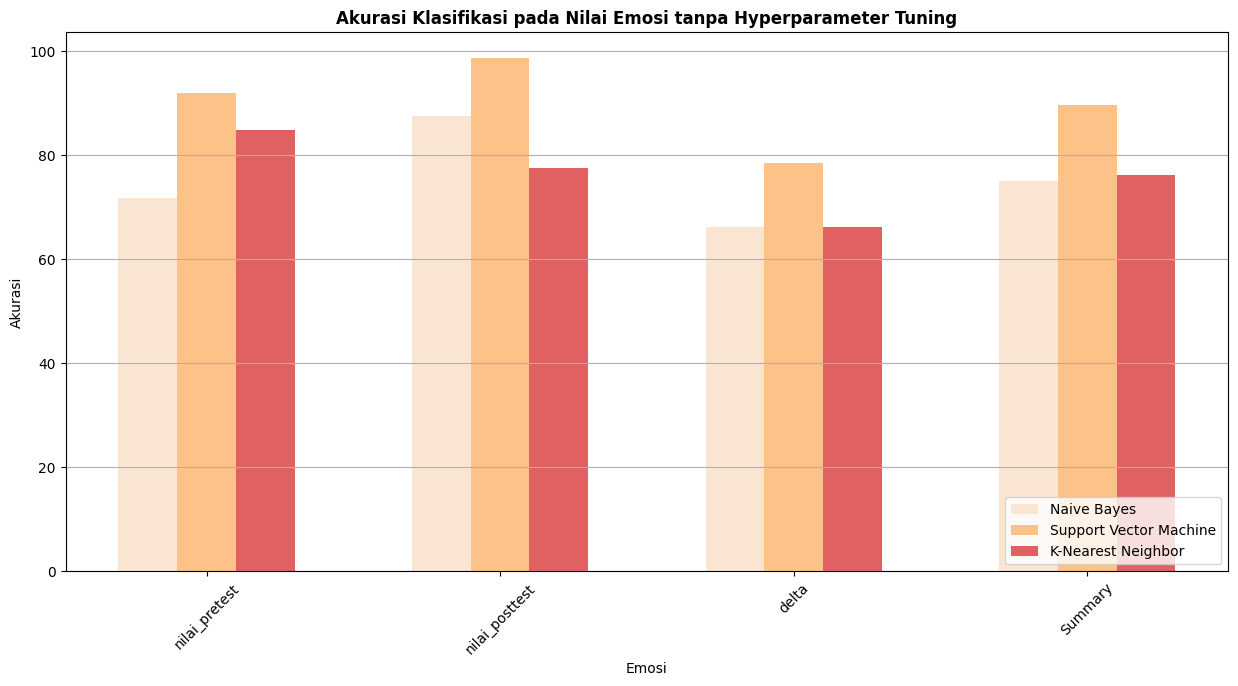

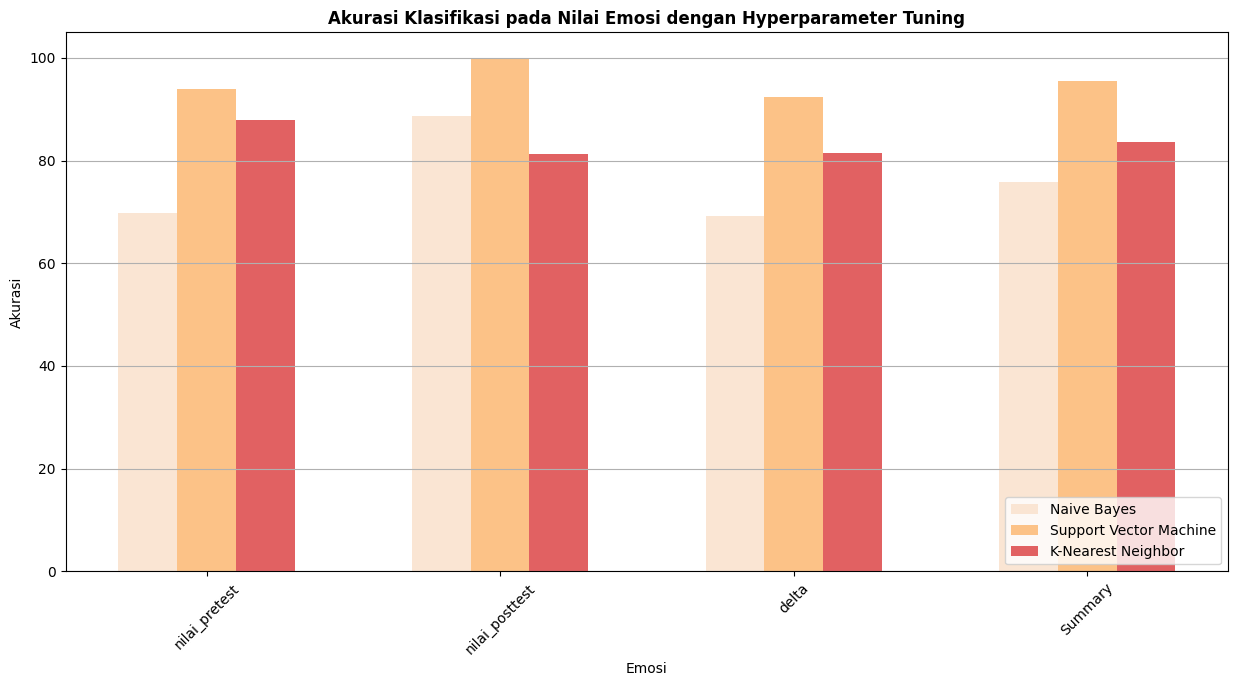

In [ ]:
# mencetak visualisasi akurasi klasifikasi yang sebelumnya telah dicetak
get_accuracyvisualization('Nilai Emosi tanpa Hyperparameter Tuning', ne_default_classif)
get_accuracyvisualization('Nilai Emosi dengan Hyperparameter Tuning', ne_classif)

--> Penjelasan

Pada ringkasan visualisasi di atas, didapatkan bahwa penggunaan Hyperparameter Tuning dapat meningkatkan performa algoritma klasifikasi. Hal ini disebabkan karena hyperparameter tuning dapat mengontrol proses pelatihan model sehingga didapatkan hyperparameter model dan hasil klasifikasi yang optimal. Diketahui, akurasi algoritma Support Vector Machine lebih mendominasi daripada dua algoritma lainnya. Dengan kata lain, algoritma Support Vector Machine cocok digunakan untuk dataset yang digunakan dalam proyek ini.

# 4. Dashboard

Export Dataset & Evaluasi Model ke File Excel

Pada bagian ini, dataset dan evaluasi model akan di-export ke dalam file excel. File Excel tersebut kemudian digunakan untuk membuat dashboard menggunakan Streamlit.

In [ ]:
# fungsi untuk mendapatkan gabungan confusion matrix
def get_confusionmatrixdataframe(emotions, confmatrix):
    # membuat dataframe baru untuk menyimpan confusion matrix gabungan
    df_res = pd.DataFrame()
    # looping untuk mendapatkan confusion matrix setiap klasifikasi
    for emotion in emotions.keys():
        df_temp = confmatrix[emotion].copy(deep=True)
        df_temp.index.name = 'Class'
        df_temp = df_temp.reset_index()
        df_temp.insert(0, 'Classification', '')
        df_temp['Classification'].iloc[0] = emotion
        df_res = pd.concat([df_res, df_temp])

    df_res.reset_index(drop=True, inplace=True)
    return df_res

In [ ]:
# memanggil fungsi get_confusionmatrixdataframe untuk mendapatkan gabungan confusion matrix
df_conf_ne_default_NB = get_confusionmatrixdataframe(y_ne_classif, confmatrix_ne_default_NB)
df_conf_ne_default_SVM = get_confusionmatrixdataframe(y_ne_classif, confmatrix_ne_default_SVM)
df_conf_ne_default_KNN = get_confusionmatrixdataframe(y_ne_classif, confmatrix_ne_default_KNN)

df_conf_ce_default_NB = get_confusionmatrixdataframe(y_ce_classif, confmatrix_ce_default_NB)
df_conf_ce_default_SVM = get_confusionmatrixdataframe(y_ce_classif, confmatrix_ce_default_SVM)
df_conf_ce_default_KNN = get_confusionmatrixdataframe(y_ce_classif, confmatrix_ce_default_KNN)

df_conf_ne_NB = get_confusionmatrixdataframe(y_ne_classif, confmatrix_ne_NB)
df_conf_ne_SVM = get_confusionmatrixdataframe(y_ne_classif, confmatrix_ne_SVM)
df_conf_ne_KNN = get_confusionmatrixdataframe(y_ne_classif, confmatrix_ne_KNN)

In [ ]:
# Membuat Pandas Excel writer dengan XlsxWriter sebagai engine
writer_cr = pd.ExcelWriter('klasifikasi/classification_report.xlsx')
writer_cm = pd.ExcelWriter('klasifikasi/confmatrix_report.xlsx')

# Write data classification report ke worksheet berbeda
ne_default_classif.to_excel(writer_cr, sheet_name='nilai_emosi')
ce_default_classif.to_excel(writer_cr, sheet_name='class_emosi')
ne_classif.to_excel(writer_cr, sheet_name='nilai_emosi_htuning')


# Write data confusion matrix report ke worksheet berbeda
df_conf_ne_default_NB.to_excel(writer_cm, index=False, sheet_name='ne_def_NB')
df_conf_ne_default_SVM.to_excel(writer_cm, index=False, sheet_name='ne_def_SVM')
df_conf_ne_default_KNN.to_excel(writer_cm, index=False, sheet_name='ne_def_KNN')

df_conf_ce_default_NB.to_excel(writer_cm, index=False, sheet_name='ce_def_NB')
df_conf_ce_default_SVM.to_excel(writer_cm, index=False, sheet_name='ce_def_SVM')
df_conf_ce_default_KNN.to_excel(writer_cm, index=False, sheet_name='ce_def_KNN')

df_conf_ne_NB.to_excel(writer_cm, index=False, sheet_name='ne_NB')
df_conf_ne_SVM.to_excel(writer_cm, index=False, sheet_name='ne_SVM')
df_conf_ne_KNN.to_excel(writer_cm, index=False, sheet_name='ne_KNN')


# Close Pandas Excel writer dan output file Excel
writer_cr.save()
writer_cm.save()

Output dari kode di atas adalah dua file excel (xlsx):
1. classification_report.xlsx
    - Terdiri dari 3 sheet
    - Masing-masing sheet berisi data akurasi klasifikasi setiap algoritma klasifikasi
2. confmatrix_report.xlsx
    - Terdiri dari 9 sheet
    - Masing-masing sheet berisi data confusion matrix setiap algoritma klasifikasi

File excel ini kemudian akan digunakan dalam Streamlit untuk pembuatan dashboard.

<hr>
<hr>
<hr>

Alhamdulillah.

Praktik Kerja Lapangan

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d50ba51-483e-487a-a800-81d0e24d7a16' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>